<span style="font-size: 27px;"><b>Load the Stock Price Data</b></span>


In [16]:

import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import numpy as np
import sys
import sys
import os

sys.path.append('C:/Users/User/Desktop/Week_1/scripts')

print("Contents of scripts directory:", os.listdir('C:/Users/User/Desktop/Week_1/scripts'))

try:
    from QuantitativeAnalysis import load_and_prepare_data
except ModuleNotFoundError as e:
    print(f"ModuleNotFoundError: {e}")

file_paths = [
    'C:/Users/User/Desktop/10/data/AAPL_historical_data.csv',
    'C:/Users/User/Desktop/10/data/AMZN_historical_data.csv',
    'C:/Users/User/Desktop/10/data/GOOG_historical_data.csv',
    'C:/Users/User/Desktop/10/data/META_historical_data.csv',
    'C:/Users/User/Desktop/10/data/MSFT_historical_data.csv',
    'C:/Users/User/Desktop/10/data/NVDA_historical_data.csv',
    'C:/Users/User/Desktop/10/data/TSLA_historical_data.csv'
]
try:
    data_frames = load_and_prepare_data(file_paths)
    for df in data_frames:
        display(df.head())
except NameError as e:
    print(f"NameError: {e}")
    

    

Contents of scripts directory: ['QuantitativeAnalysis.py', 'README.md', '__pycache__']


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


<span style="font-size: 27px;"><b>Technical Analysis Indicators</b></span>

In [17]:
from QuantitativeAnalysis import compute_technical_indicators


indicators = compute_technical_indicators(data_frames)


DataFrame 1 with Indicators:
         Date     Close  SMA_50  RSI_14  MACD  MACD_Signal  MACD_Hist
0  1980-12-12  0.128348     NaN     NaN   NaN          NaN        NaN
1  1980-12-15  0.121652     NaN     NaN   NaN          NaN        NaN
2  1980-12-16  0.112723     NaN     NaN   NaN          NaN        NaN
3  1980-12-17  0.115513     NaN     NaN   NaN          NaN        NaN
4  1980-12-18  0.118862     NaN     NaN   NaN          NaN        NaN 

DataFrame 2 with Indicators:
         Date     Close  SMA_50  RSI_14  MACD  MACD_Signal  MACD_Hist
0  1997-05-15  0.097917     NaN     NaN   NaN          NaN        NaN
1  1997-05-16  0.086458     NaN     NaN   NaN          NaN        NaN
2  1997-05-19  0.085417     NaN     NaN   NaN          NaN        NaN
3  1997-05-20  0.081771     NaN     NaN   NaN          NaN        NaN
4  1997-05-21  0.071354     NaN     NaN   NaN          NaN        NaN 

DataFrame 3 with Indicators:
         Date     Close  SMA_50  RSI_14  MACD  MACD_Signal  MACD_Hist

<span style="font-size: 27px;"><b>PyNance for Financial Metrics</b></span>


In [18]:

from QuantitativeAnalysis import compute_financial_metrics


compute_financial_metrics(data_frames)

DataFrame 1 Annualized Return: 18.59%
DataFrame 1 Volatility: 44.28%
DataFrame 1 Sharpe Ratio: 0.40

DataFrame 2 Annualized Return: 31.92%
DataFrame 2 Volatility: 56.24%
DataFrame 2 Sharpe Ratio: 0.55

DataFrame 3 Annualized Return: 23.66%
DataFrame 3 Volatility: 30.67%
DataFrame 3 Sharpe Ratio: 0.74

DataFrame 4 Annualized Return: 27.50%
DataFrame 4 Volatility: 38.54%
DataFrame 4 Sharpe Ratio: 0.69

DataFrame 5 Annualized Return: 24.39%
DataFrame 5 Volatility: 33.54%
DataFrame 5 Sharpe Ratio: 0.70

DataFrame 6 Annualized Return: 36.00%
DataFrame 6 Volatility: 60.11%
DataFrame 6 Sharpe Ratio: 0.58

DataFrame 7 Annualized Return: 42.07%
DataFrame 7 Volatility: 56.94%
DataFrame 7 Sharpe Ratio: 0.72



<span style="font-size: 27px;"><b>Visualize the Data</b></span>


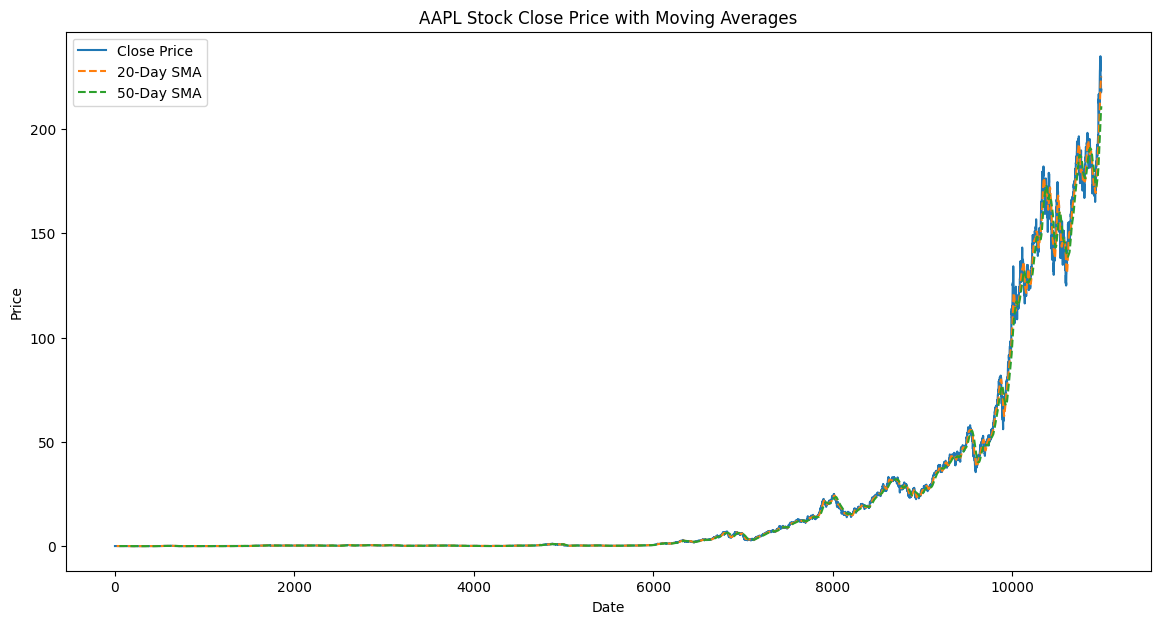

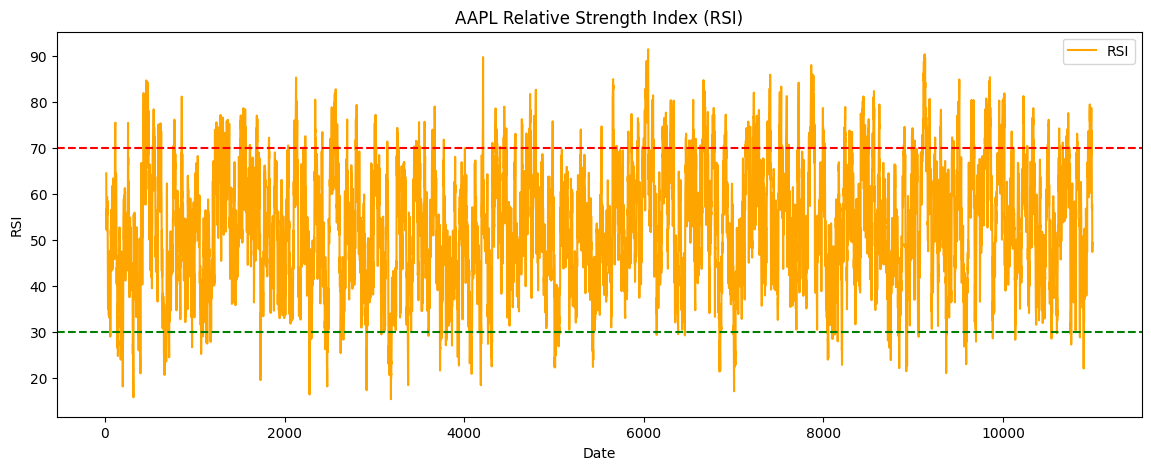

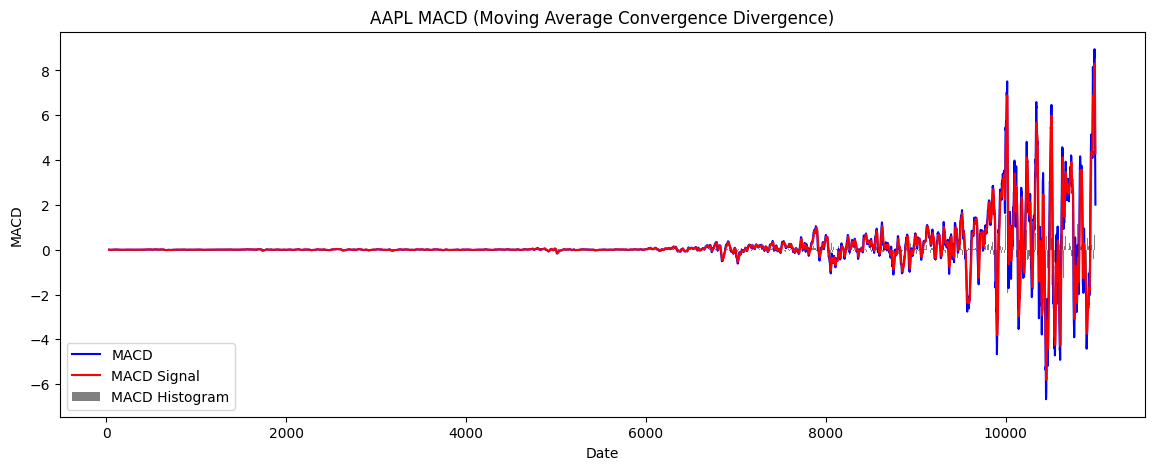

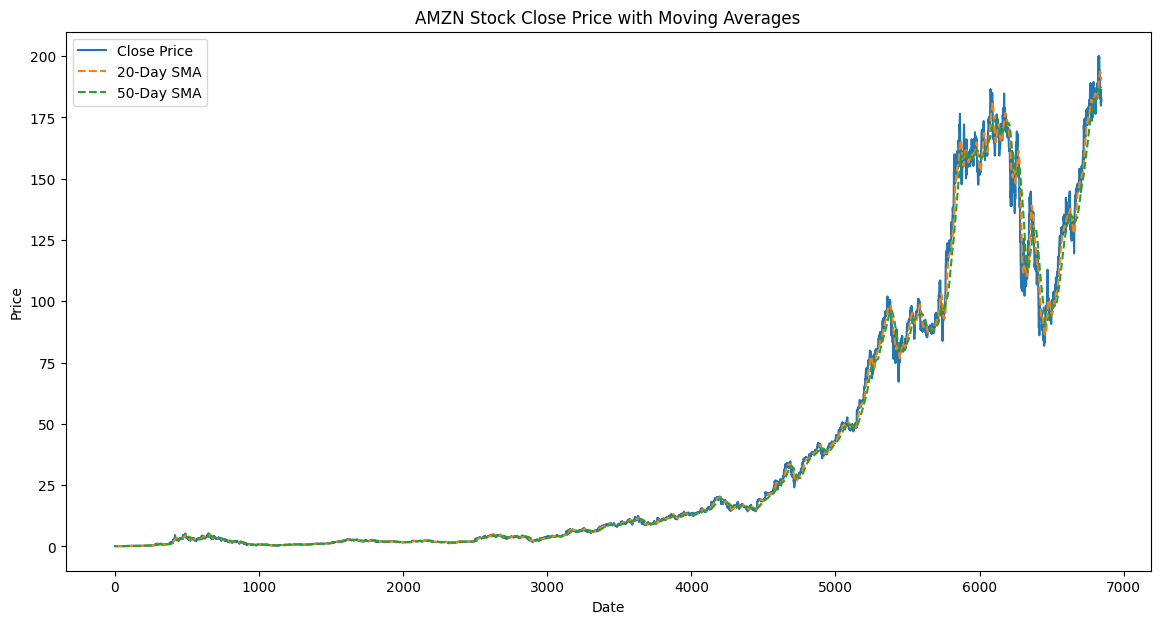

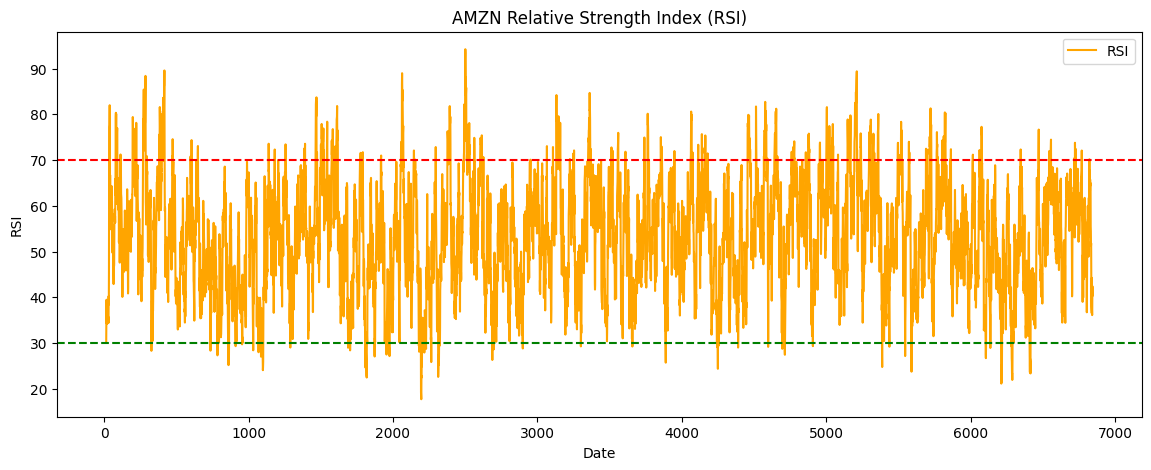

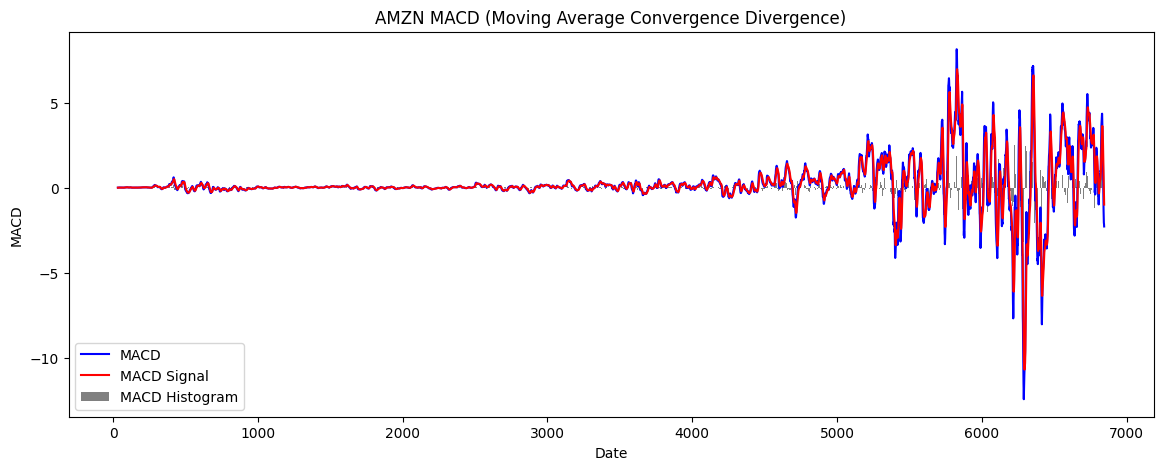

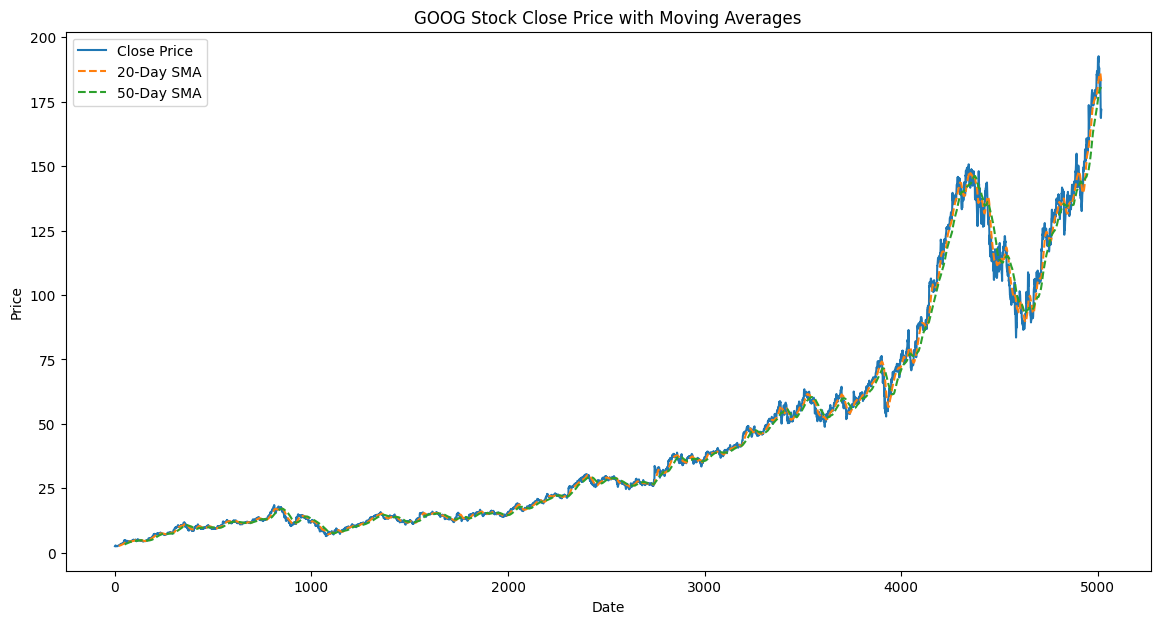

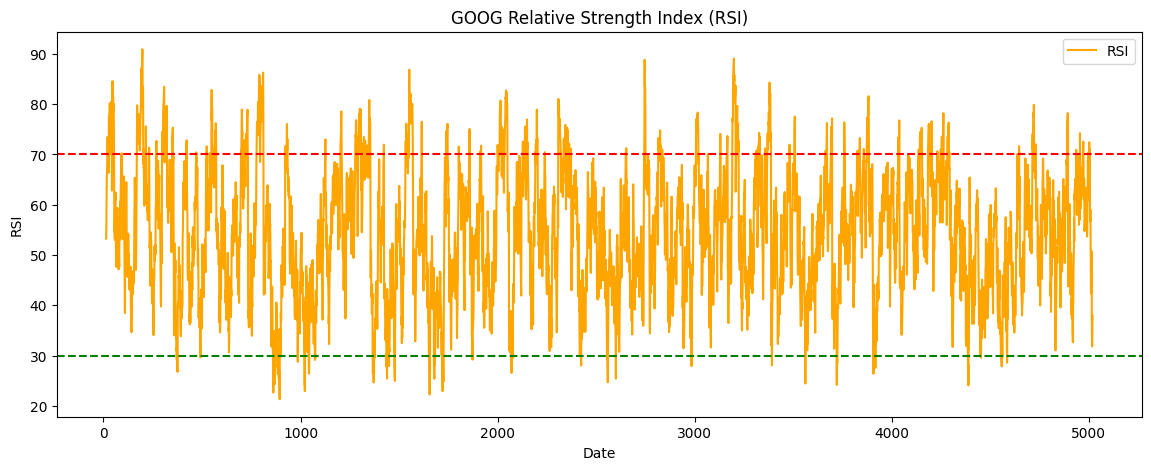

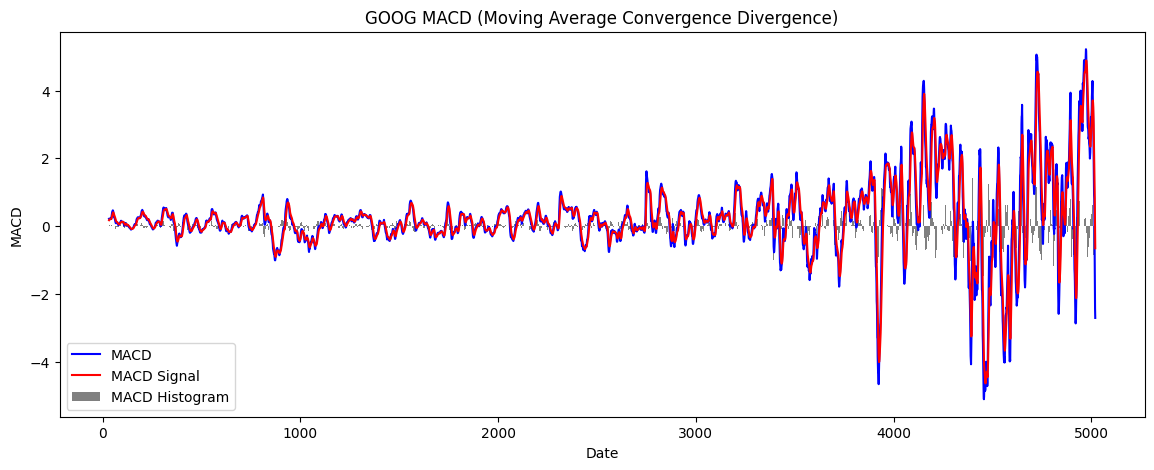

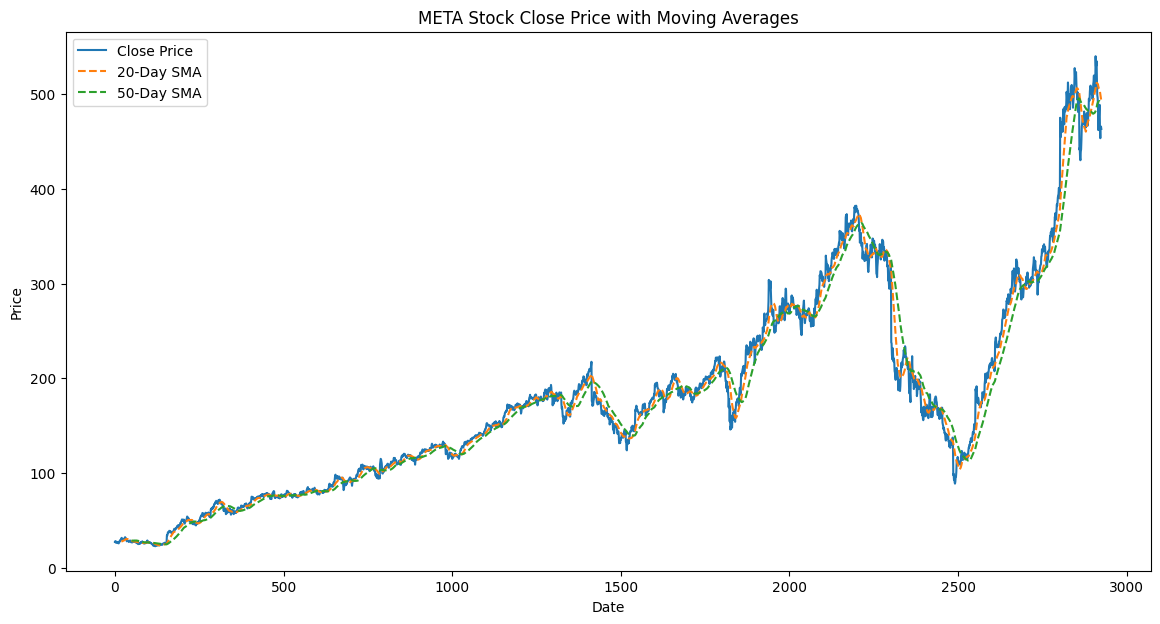

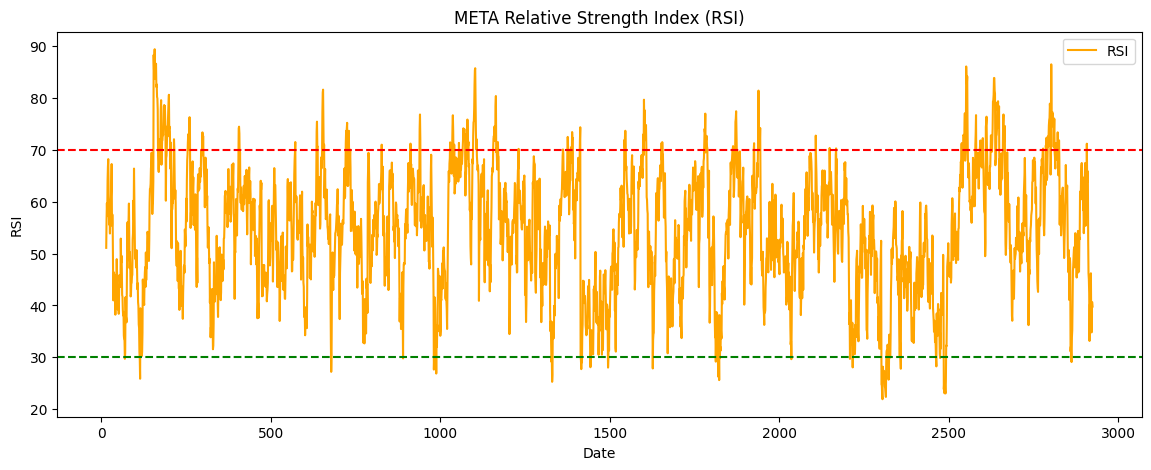

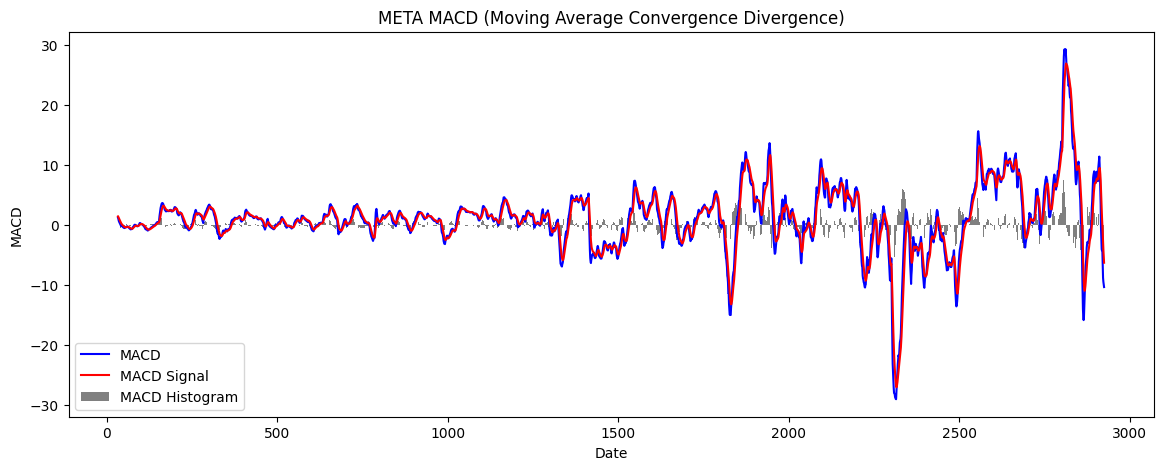

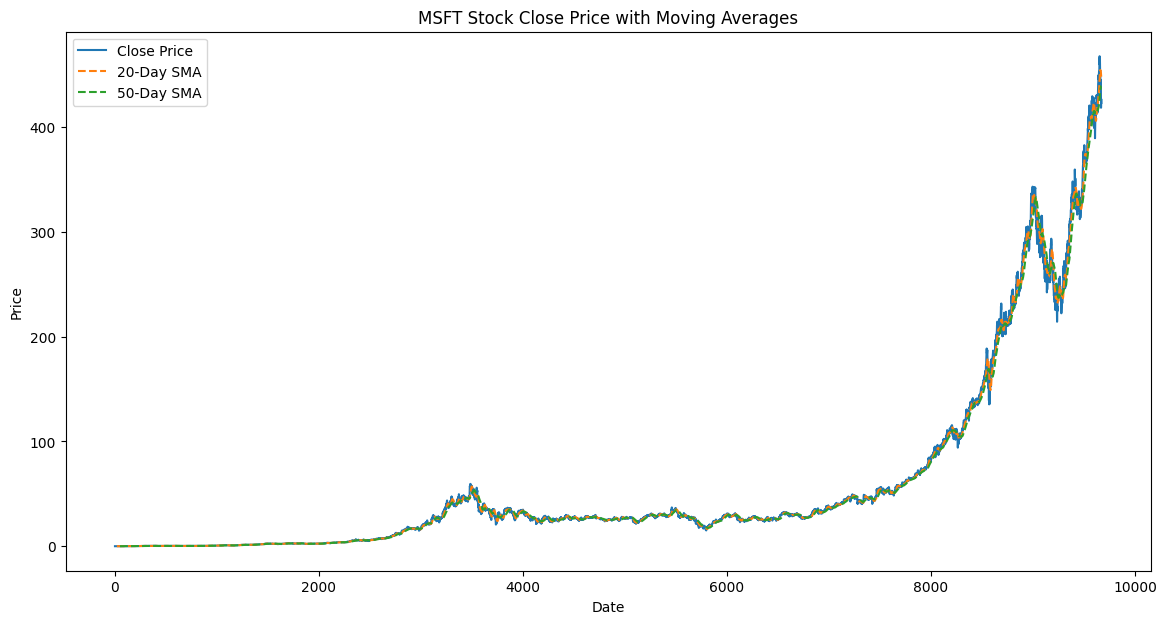

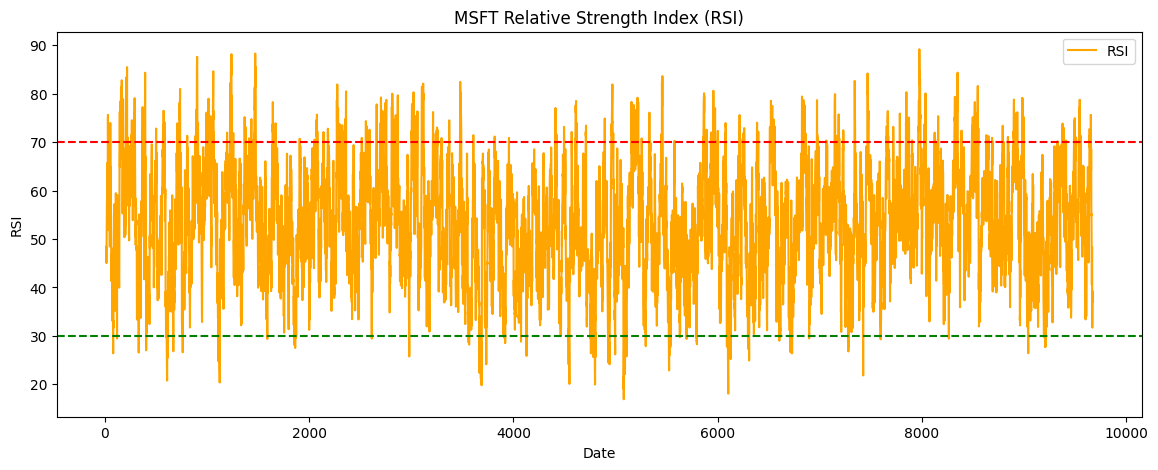

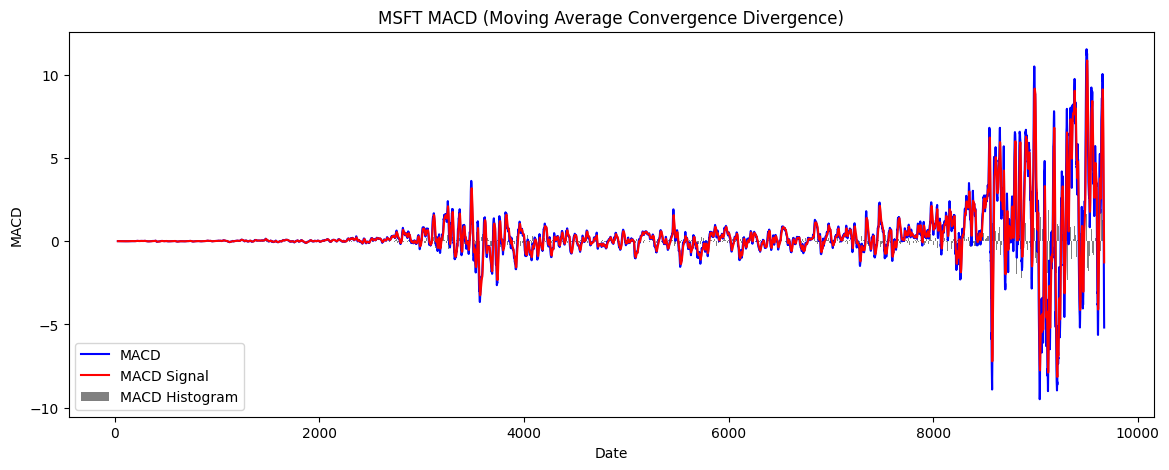

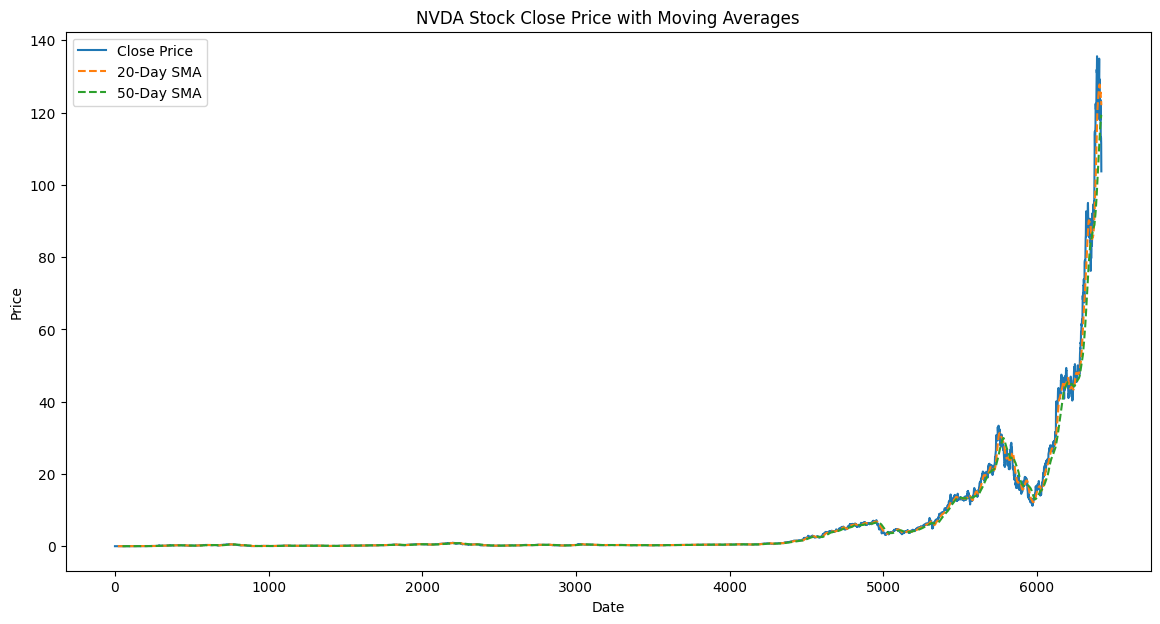

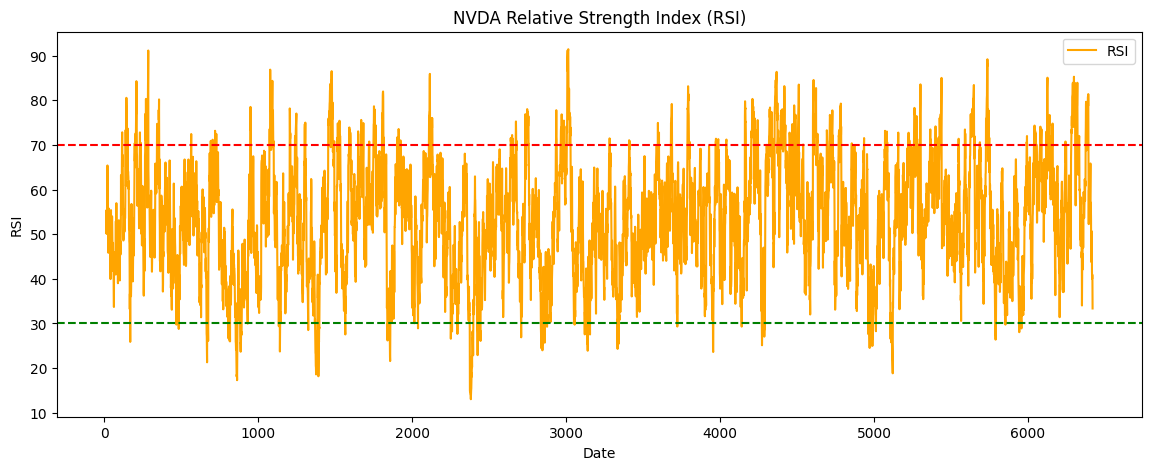

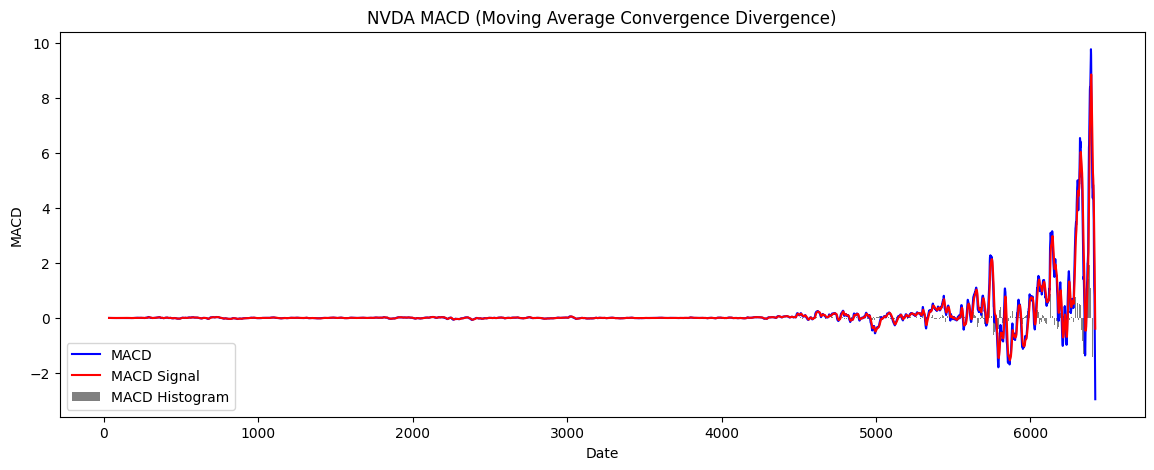

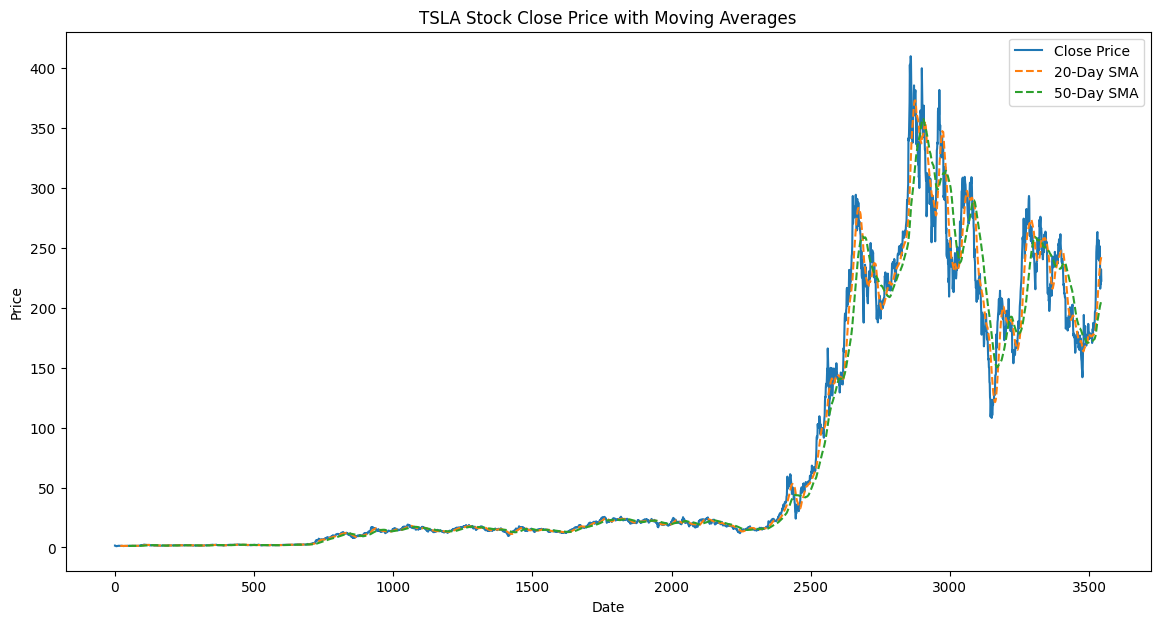

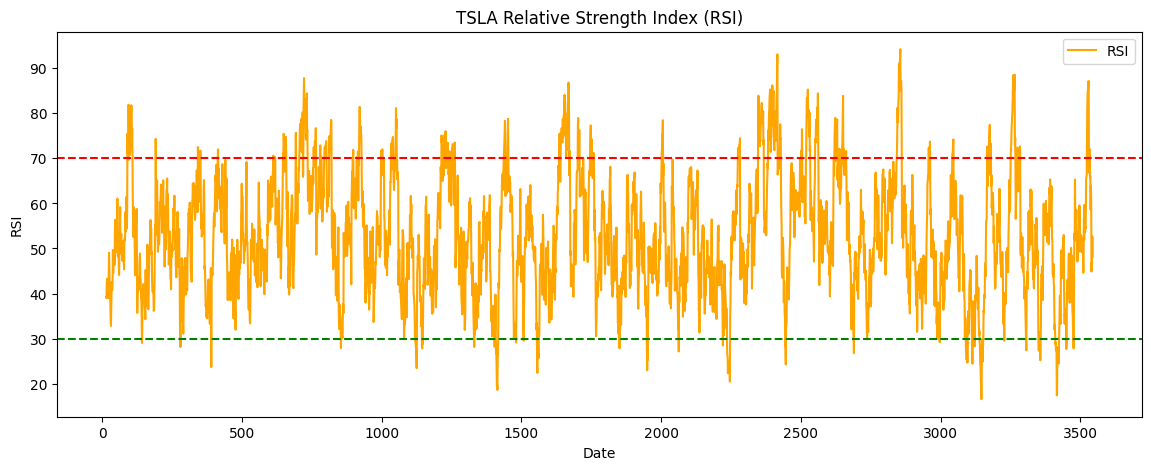

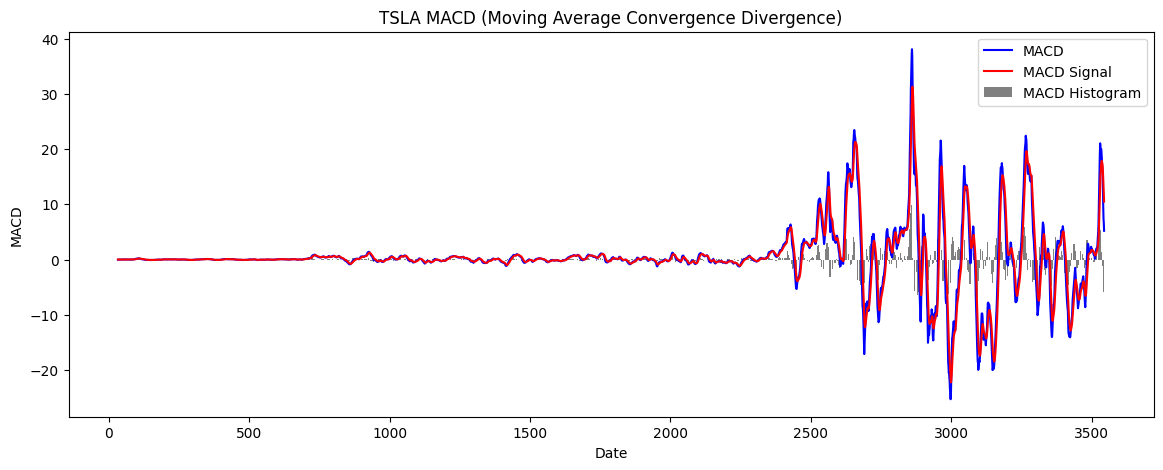

In [19]:

from QuantitativeAnalysis import compute_and_plot_technical_indicators


stock_tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

compute_and_plot_technical_indicators(data_frames, stock_tickers)